# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы результаты можно было повторить

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [X] Отобразите 30 случайных строк тренировочного датасета.
- [X] Отобразите первые 5 и последние 5 объектов тестового датасета
- [X] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [X] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [X] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
   Ответ: В америке любят японские машины, большинство машин с ручной коробкой передач, дизель\бензин ~50\50, чаще всего продает машину первый владелец. Нельзя сказать средние по числовым признакам
- [X] Достаточно ли метода duplicated для анализа дубликатов? Почему?
    Ответ: Нет, так как через него вывести дубликатные строки

**0.15 балла**
- [X] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)
- Построил в файле ydata_profile_report.html

In [4]:
df_train.sample(n=30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
pd.concat(
    [df_test.head(5),
     df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
dataset = pd.concat([df_test, df_train])
dataset.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
dataset.duplicated().sum()


np.int64(1170)

In [8]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport
import warnings

warnings.filterwarnings('ignore')
profile = ProfileReport(dataset, explorative=True)
profile.to_file("ydata_profile_report.html")
print("Документ сохранен")

D:\Projects\ML_AI25\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<?, ?it/s]

Документ сохранен


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [X] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
from sklearn import impute


def extract_number(value):
    if pd.isna(value):
        return np.nan
    value_str = str(value).strip()
    import re
    match = re.search(r'(\d+\.?\d*)', value_str)
    if match:
        return float(match.group(1))
    return np.nan


df_train['mileage'] = df_train['mileage'].apply(extract_number)
df_train['engine'] = df_train['engine'].apply(extract_number)
df_train['max_power'] = df_train['max_power'].apply(extract_number)

df_test['mileage'] = df_test['mileage'].apply(extract_number)
df_test['engine'] = df_test['engine'].apply(extract_number)
df_test['max_power'] = df_test['max_power'].apply(extract_number)

f_mask = (df_train.dtypes == 'object').values

mis_replaser = impute.SimpleImputer(strategy="median")

df_train_real = df_train[df_train.columns[~f_mask]]
df_train_no_mis_real = pd.DataFrame(data=mis_replaser.fit_transform(df_train_real), columns=df_train_real.columns)
df_train_cat = df_train[df_train.columns[f_mask]].fillna("NA")
df_train_cat.reset_index(drop=True, inplace=True)

df_train = pd.concat([df_train_no_mis_real, df_train_cat], axis=1)

df_test_real = df_test[df_test.columns[~f_mask]]
df_test_no_mis_real = pd.DataFrame(data=mis_replaser.fit_transform(df_test_real), columns=df_test_real.columns)
df_test_cat = df_test[df_test.columns[f_mask]].fillna("NA")
df_test_cat.reset_index(drop=True, inplace=True)

df_test = pd.concat([df_test_no_mis_real, df_test_cat], axis=1)



### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [X] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [X] Отобразите такие объекты (0.15 балла)
- [X] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [X]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
feature_columns = [col for col in df_train.columns if col != 'selling_price']
duplicates_mask = df_train.duplicated(subset=feature_columns, keep=False)
num_duplicates = duplicates_mask.sum()

print(f"Количество одинаковых объектов: {num_duplicates}")


Количество одинаковых объектов: 1799


In [11]:
# Примеры дубликатов
duplicated_rows = df_train[duplicates_mask].sort_values(by=feature_columns)
duplicated_rows.head(20)


,year,selling_price,km_driven,mileage,engine,max_power,seats,name,fuel,seller_type,transmission,owner,torque
4574,1999.0,150000.0,198000.0,14.8,1998.0,68.0,5.0,Mitsubishi Lancer 2.0 GLd,Diesel,Individual,Manual,Second Owner,"12.5@ 3,000(kgm@ rpm)"
6436,1999.0,150000.0,198000.0,14.8,1998.0,68.0,5.0,Mitsubishi Lancer 2.0 GLd,Diesel,Individual,Manual,Second Owner,"12.5@ 3,000(kgm@ rpm)"
6856,2000.0,45957.0,90000.0,19.7,796.0,46.3,5.0,Maruti Alto LX,Petrol,Individual,Manual,Second Owner,62Nm@ 3000rpm
6875,2000.0,45957.0,90000.0,19.7,796.0,46.3,5.0,Maruti Alto LX,Petrol,Individual,Manual,Second Owner,62Nm@ 3000rpm
899,2000.0,200000.0,100000.0,19.3,1248.0,82.0,5.0,Toyota Qualis Fleet A3,Diesel,Individual,Manual,First Owner,NA
6764,2000.0,200000.0,100000.0,19.3,1248.0,82.0,5.0,Toyota Qualis Fleet A3,Diesel,Individual,Manual,First Owner,NA
1699,2001.0,60000.0,71000.0,19.3,1248.0,82.0,5.0,Hyundai Santro GS zipPlus,Petrol,Individual,Manual,Second Owner,NA
3727,2001.0,60000.0,71000.0,19.3,1248.0,82.0,5.0,Hyundai Santro GS zipPlus,Petrol,Individual,Manual,Second Owner,NA
4576,2002.0,95000.0,90000.0,19.3,1248.0,82.0,5.0,Maruti Esteem Lxi,Petrol,Individual,Manual,Third Owner,NA
6437,2002.0,95000.0,90000.0,19.3,1248.0,82.0,5.0,Maruti Esteem Lxi,Petrol,Individual,Manual,Third Owner,NA


In [12]:
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
df_train = df_train.reset_index(drop=True)
print(df_train.shape)

(5840, 13)


In [13]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [X] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [X] Приведите тип данных к ``float``.
* [X] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [14]:
# Первые два пункта сделал в предыдущем шаге


# Удаляем столбец torque
df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

print(df_train.dtypes)

year             float64
selling_price    float64
km_driven        float64
mileage          float64
engine           float64
max_power        float64
seats            float64
name              object
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [15]:
df_train["seats"] = df_train["seats"].apply(int)
df_train["engine"] = df_train["engine"].apply(int)

df_test["seats"] = df_test["seats"].apply(int)
df_test["engine"] = df_test["engine"].apply(int)

df_train.dtypes

year             float64
selling_price    float64
km_driven        float64
mileage          float64
engine             int64
max_power        float64
seats              int64
name              object
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [X] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [X] Сделайте вывод.
- Ответ: данные в тесте cогласуются с траин

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [16]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [17]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338050,1454.87600,90.865230,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951748,521.99574,34.887729,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [18]:
df_train.describe(include=['O'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [19]:
df_test.describe(include=['O'])


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [20]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [X] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [X] Постройте pairplot по тестовым данным
- [X] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

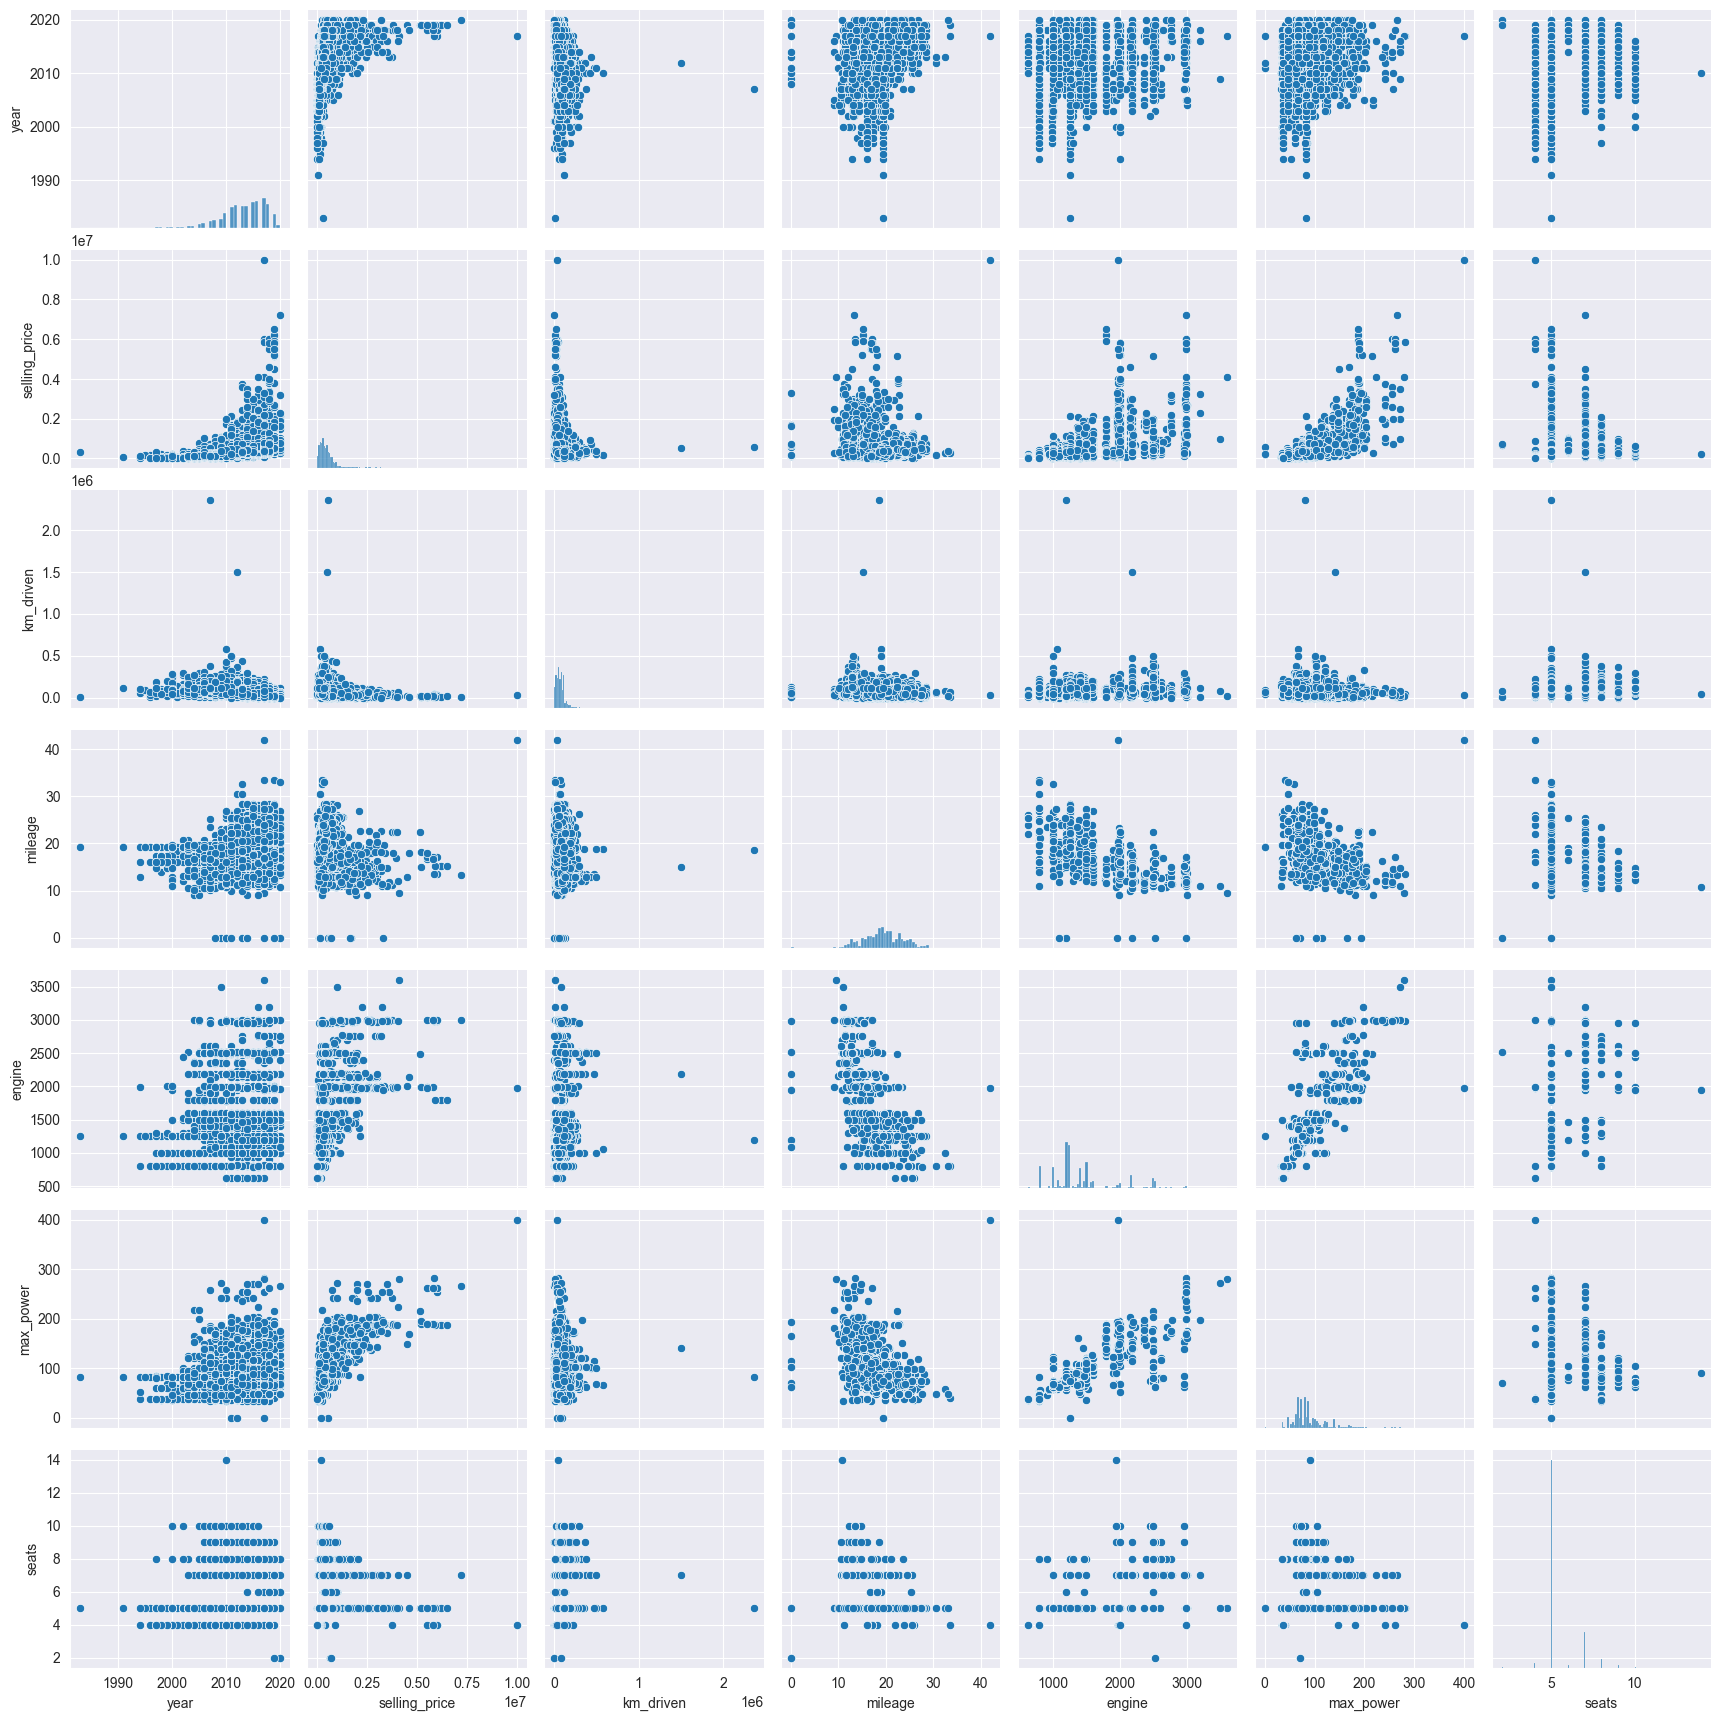

In [21]:
%matplotlib inline

cols_to_plot = [col for col in df_train.columns if df_train[col].dtype != 'object']

sns.pairplot(df_train[cols_to_plot])
plt.show()

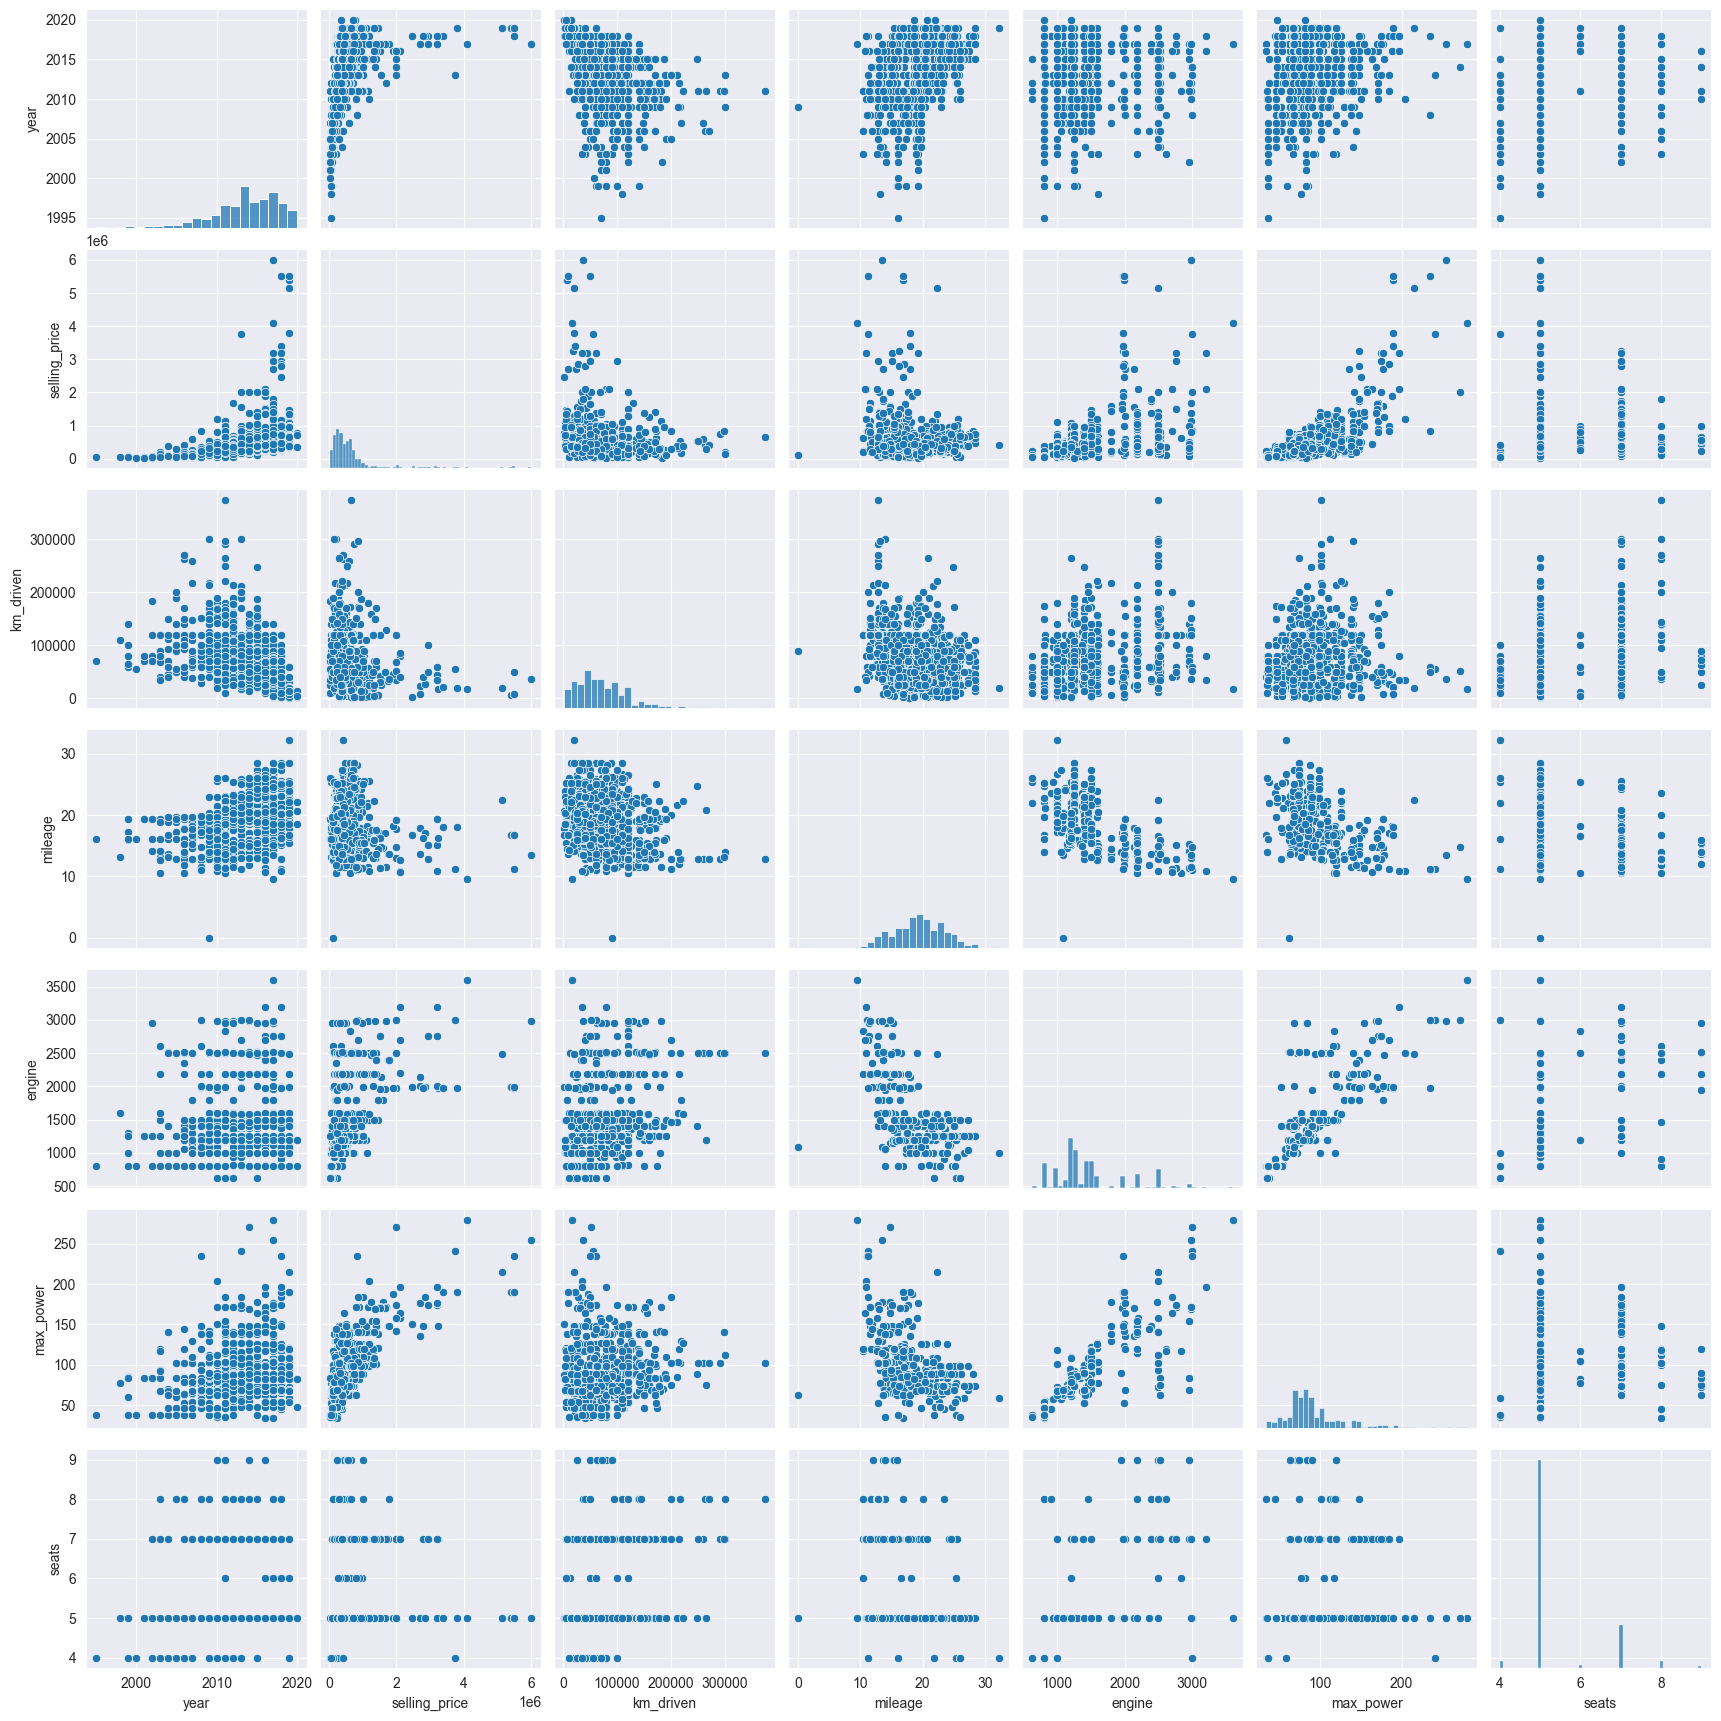

In [22]:
cols_to_plot = [col for col in df_test.columns if df_test[col].dtype != 'object']

sns.pairplot(df_test[cols_to_plot])
plt.show()

#### engine и max_power положительная связь машины с более мощными двигателями обычно выше в цене
#### year сильная положительная связь новые машины дороже
#### km_driven отрицательная связь чем больше пробег тем ниже цена

#### распределения в трейн и тесте похожи


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [X] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [X] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

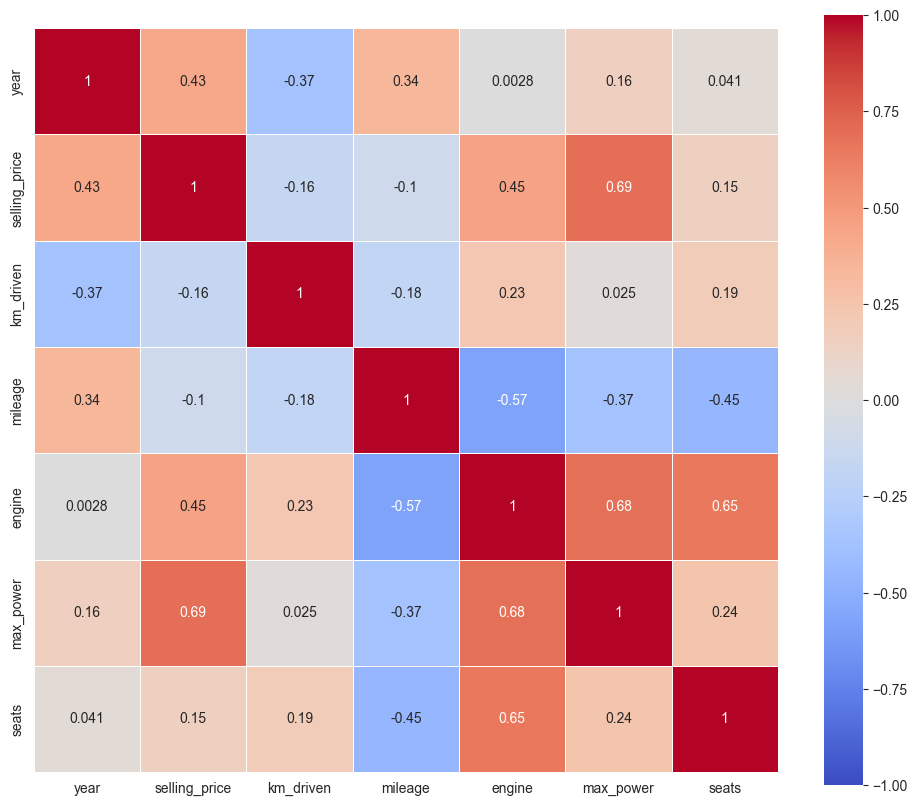

In [23]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = df_train[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.show()


- [X] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**ОТВЕТЫ:**
1) seats и year количество мест в автомобиле практически не зависит от года выпуска, seats и km_driven также очень слабая корреляция

2) engine и max_power т.к. более мощные двигатели обычно имеют больший объём
   year и selling_price новые автомобили стоят дороже
   max_power и selling_price более мощные автомобили дороже

3) Да, чем старше автомобиль тем больше пробег

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

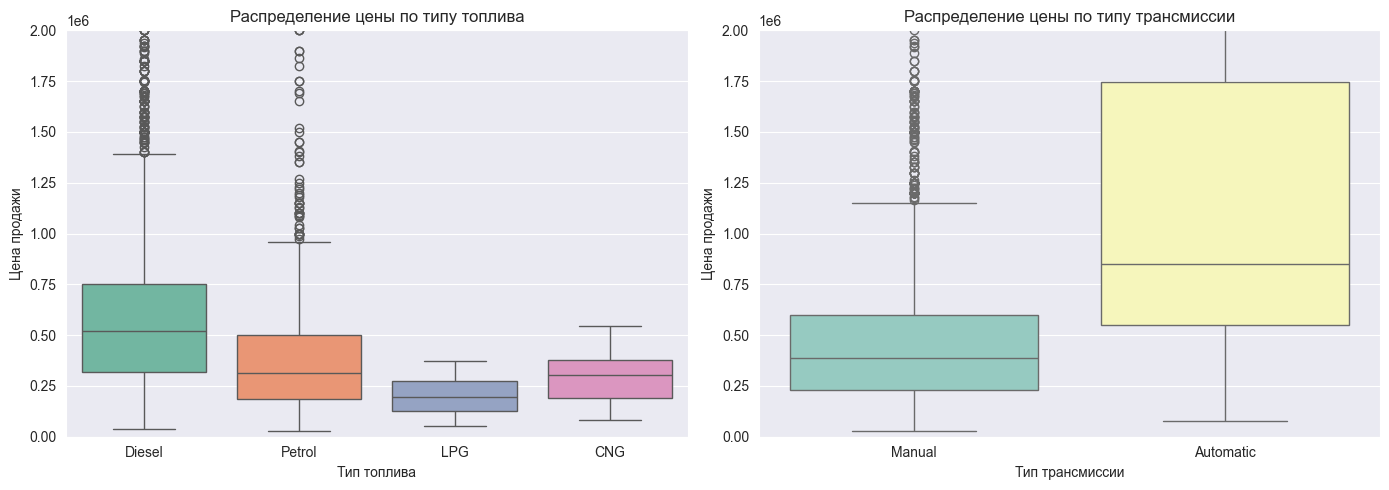

Вывод: Автомобили с автоматической трансмиссией в среднем дороже.
Дизельные автомобили имеют более широкий разброс цен и в среднем дороже бензиновых.



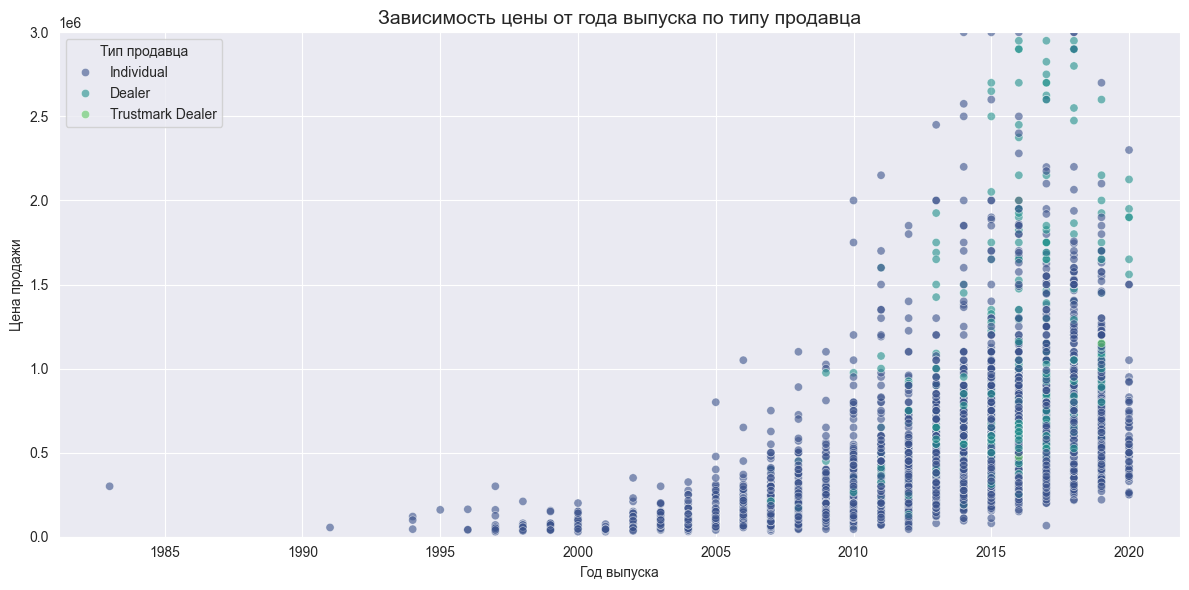

Вывод: Trustmark Dealer и Dealer чаще предлагают более новые и дорогие автомобили.
Частные лица продают автомобили в более широком ценовом диапазоне.



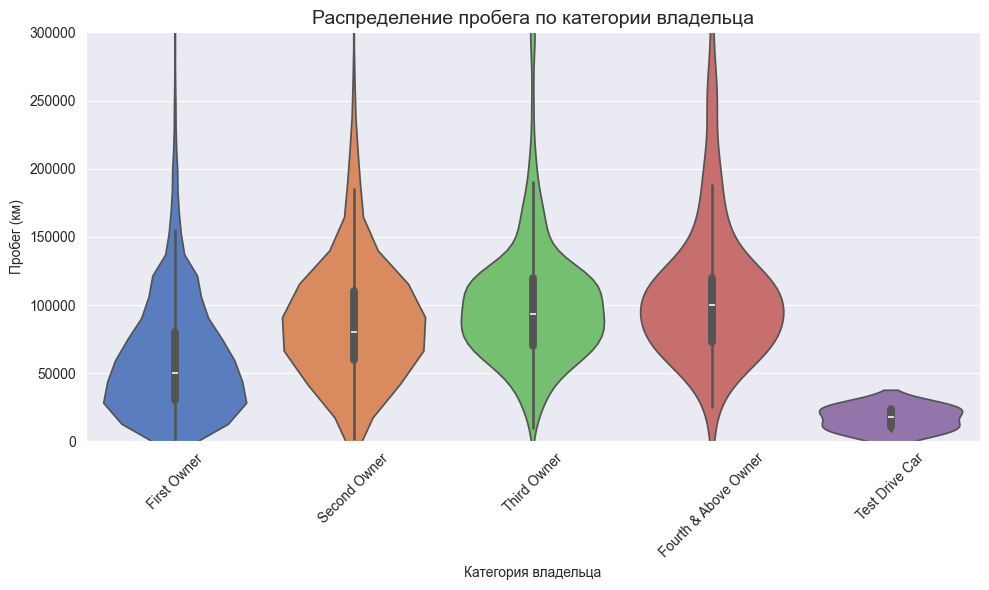

Вывод: Автомобили от первого владельца обычно имеют меньший пробег.
С увеличением количества владельцев средний пробег возрастает.


In [24]:
# Распределение цены по типу топлива и трансмиссии
# Тип топлива и трансмиссия ключевые факторы при покупке автомобиля.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot цены по типу топлива
sns.boxplot(data=df_train, x='fuel', y='selling_price', ax=axes[0], palette='Set2')
axes[0].set_title('Распределение цены по типу топлива', fontsize=12)
axes[0].set_xlabel('Тип топлива')
axes[0].set_ylabel('Цена продажи')
axes[0].set_ylim(0, 2000000)  # Ограничиваем для лучшей читаемости

# Boxplot цены по трансмиссии
sns.boxplot(data=df_train, x='transmission', y='selling_price', ax=axes[1], palette='Set3')
axes[1].set_title('Распределение цены по типу трансмиссии', fontsize=12)
axes[1].set_xlabel('Тип трансмиссии')
axes[1].set_ylabel('Цена продажи')
axes[1].set_ylim(0, 2000000)

plt.tight_layout()
plt.show()

print("Вывод: Автомобили с автоматической трансмиссией в среднем дороже.")
print("Дизельные автомобили имеют более широкий разброс цен и в среднем дороже бензиновых.")
print()

# Зависимость цены от года выпуска с разбивкой по типу продавца
# Важно понять, влияет ли тип продавца на цену при одинаковом годе выпуска.

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_train, x='year', y='selling_price', hue='seller_type',
                alpha=0.6, palette='viridis')
plt.title('Зависимость цены от года выпуска по типу продавца', fontsize=14)
plt.xlabel('Год выпуска')
plt.ylabel('Цена продажи')
plt.legend(title='Тип продавца')
plt.ylim(0, 3000000)
plt.tight_layout()
plt.show()

print("Вывод: Trustmark Dealer и Dealer чаще предлагают более новые и дорогие автомобили.")
print("Частные лица продают автомобили в более широком ценовом диапазоне.")
print()

# Распределение пробега по категории владельца
# Количество предыдущих владельцев может влиять на пробег и состояние авто.

plt.figure(figsize=(10, 6))
owner_order = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']
sns.violinplot(data=df_train, x='owner', y='km_driven', order=owner_order, palette='muted')
plt.title('Распределение пробега по категории владельца', fontsize=14)
plt.xlabel('Категория владельца')
plt.ylabel('Пробег (км)')
plt.xticks(rotation=45)
plt.ylim(0, 300000)
plt.tight_layout()
plt.show()

print("Вывод: Автомобили от первого владельца обычно имеют меньший пробег.")
print("С увеличением количества владельцев средний пробег возрастает.")

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [25]:
target = "selling_price"

# name
# fuel
# seller_type
# transmission
# owner

df_train_clean = df_train.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])

X_train = df_train_clean.drop(columns=[target])
y_train = df_train_clean[target]

In [26]:
df_test_clean = df_test.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])
X_test = df_test_clean.drop(columns=[target])
y_test = df_test_clean[target]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [X] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [X] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5922629595849869

In [28]:
reg.score(X_test, y_test)

0.59414385195975

In [29]:

y_pred = reg.predict(X_test)

MSE(y_test, y_pred)

233297703374.95956

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred = reg.predict(X_train_scaled)
y_test_pred  = reg.predict(X_test_scaled)

mse_train = MSE(y_train, y_train_pred)
mse_test  = MSE(y_test,  y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

print(f"Train: R2 = {r2_train:.4f}, MSE = {mse_train:.4e}")
print(f"Test: R2 = {r2_test:.4f}, MSE = {mse_test:.4e}")


Train: R2 = 0.5923, MSE = 1.1687e+11
Test: R2 = 0.5941, MSE = 2.3330e+11


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [X] Какой признак оказался наиболее информативным в предсказании цены?

In [31]:
import matplotlib.pyplot as plt

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': reg.coef_
})

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("Коэффициенты модели:")
print(coefficients)
print(f"\nНаиболее информативный признак: max_power")

Коэффициенты модели:
     Feature    Coefficient  Abs_Coefficient
4  max_power  322779.703236    322779.703236
0       year  152843.262358    152843.262358
3     engine   61176.857150     61176.857150
1  km_driven  -44148.047511     44148.047511
2    mileage   28781.086595     28781.086595
5      seats  -23220.570226     23220.570226

Наиболее информативный признак: max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [32]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)


y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)


mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)


print(f"Train: R2 = {r2_train_lasso:.4f}, MSE = {mse_train_lasso:.4e}")
print(f"Test: R2 = {r2_test_lasso:.4f}, MSE = {mse_test_lasso:.4e}")

Train: R2 = 0.5923, MSE = 1.1687e+11
Test: R2 = 0.5941, MSE = 2.3330e+11


In [33]:
lasso_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})

print(lasso_coefficients.sort_values('Coefficient', key=abs, ascending=False))


zero_coeffs = (lasso_model.coef_ == 0).sum()
print(f"\nКоличество занулившихся коэффициентов: 0")


     Feature    Coefficient
4  max_power  322780.586197
0       year  152843.083853
3     engine   61172.025780
1  km_driven  -44146.918538
2    mileage   28779.204085
5      seats  -23217.693273

Количество занулившихся коэффициентов: 0


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]
}

lasso_grid = GridSearchCV(
    estimator=Lasso(random_state=42, max_iter=10000),
    param_grid=param_grid_lasso,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=1
)

lasso_grid.fit(X_train_scaled, y_train)

print(f"\nЛучшие параметры: {lasso_grid.best_params_}")
print(f"Лучшее значение R2 на кросс-валидации: {lasso_grid.best_score_:.4f}")

n_alphas = len(param_grid_lasso['alpha'])
n_folds = 10
total_models = n_alphas * n_folds
print(f"\nКоличество обученных моделей: {total_models} ({n_alphas} значений alpha × {n_folds} фолдов)")

best_lasso = lasso_grid.best_estimator_
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)
y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)

r2_train_best_lasso = r2_score(y_train, y_train_pred_best_lasso)
r2_test_best_lasso = r2_score(y_test, y_test_pred_best_lasso)
mse_train_best_lasso = MSE(y_train, y_train_pred_best_lasso)
mse_test_best_lasso = MSE(y_test, y_test_pred_best_lasso)

print(f"\nРезультаты лучшей модели:")
print(f"Train: R2 = {r2_train_best_lasso:.4f}, MSE = {mse_train_best_lasso:.4e}")
print(f"Test:  R2 = {r2_test_best_lasso:.4f}, MSE = {mse_test_best_lasso:.4e}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Лучшие параметры: {'alpha': 500.0}
Лучшее значение R2 на кросс-валидации: 0.5685

Количество обученных моделей: 100 (10 значений alpha × 10 фолдов)

Результаты лучшей модели:
Train: R2 = 0.5923, MSE = 1.1688e+11
Test:  R2 = 0.5936, MSE = 2.3363e+11


In [35]:
lasso_best_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_lasso.coef_
})

print(f"Коэффициент регуляризации лучшей модели: alpha = {best_lasso.alpha}")
print("\nКоэффициенты лучшей Lasso модели:")
print(lasso_best_coefficients.sort_values('Coefficient', key=abs, ascending=False))

zero_coeffs_best = (best_lasso.coef_ == 0).sum()
print(f"\nКоличество занулившихся коэффициентов: {zero_coeffs_best} из {len(best_lasso.coef_)}")


print("\nВывод: При оптимальном alpha ни один коэффициент не занулился.")
print("все признаки вносят значимый вклад в предсказание цены.")

Коэффициент регуляризации лучшей модели: alpha = 500.0

Коэффициенты лучшей Lasso модели:
     Feature    Coefficient
4  max_power  323208.592625
0       year  152726.095733
3     engine   58816.716824
1  km_driven  -43598.832409
2    mileage   27882.926059
5      seats  -21791.731355

Количество занулившихся коэффициентов: 0 из 6

Вывод: При оптимальном alpha ни один коэффициент не занулился.
все признаки вносят значимый вклад в предсказание цены.


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [36]:
from sklearn.linear_model import ElasticNet

param_grid_elasticnet = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]
}

elasticnet_grid = GridSearchCV(
    estimator=ElasticNet(random_state=42, max_iter=10000),
    param_grid=param_grid_elasticnet,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=1
)

elasticnet_grid.fit(X_train_scaled, y_train)

print(f"\nЛучшие параметры: {elasticnet_grid.best_params_}")
print(f"Лучшее значение R2 на кросс-валидации: {elasticnet_grid.best_score_:.4f}")

n_alphas = len(param_grid_elasticnet['alpha'])
n_l1_ratios = len(param_grid_elasticnet['l1_ratio'])
n_folds = 10
total_models_elastic = n_alphas * n_l1_ratios * n_folds
print(f"\nКоличество обученных моделей: {total_models_elastic}")
print(f"({n_alphas} значений alpha × {n_l1_ratios} значений l1_ratio × {n_folds} фолдов)")

best_elasticnet = elasticnet_grid.best_estimator_
y_test_pred_elastic = best_elasticnet.predict(X_test_scaled)
y_train_pred_elastic = best_elasticnet.predict(X_train_scaled)

r2_train_elastic = r2_score(y_train, y_train_pred_elastic)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)
mse_train_elastic = MSE(y_train, y_train_pred_elastic)
mse_test_elastic = MSE(y_test, y_test_pred_elastic)

print(f"\nРезультаты лучшей ElasticNet модели:")
print(f"Train: R2 = {r2_train_elastic:.4f}, MSE = {mse_train_elastic:.4e}")
print(f"Test:  R2 = {r2_test_elastic:.4f}, MSE = {mse_test_elastic:.4e}")

elasticnet_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_elasticnet.coef_
})

print("\nКоэффициенты лучшей ElasticNet модели:")
print(elasticnet_coefficients.sort_values('Coefficient', key=abs, ascending=False))

zero_coeffs_elastic = (best_elasticnet.coef_ == 0).sum()
print(f"\nКоличество занулившихся коэффициентов: {zero_coeffs_elastic} из {len(best_elasticnet.coef_)}")

print(f"LinearRegression:     Train R2={r2_train:.4f}, Test R2={r2_test:.4f}")
print(f"Lasso (default):      Train R2={r2_train_lasso:.4f}, Test R2={r2_test_lasso:.4f}")
print(f"Lasso (best):         Train R2={r2_train_best_lasso:.4f}, Test R2={r2_test_best_lasso:.4f}")
print(f"ElasticNet (best):    Train R2={r2_train_elastic:.4f}, Test R2={r2_test_elastic:.4f}")

Fitting 10 folds for each of 42 candidates, totalling 420 fits

Лучшие параметры: {'alpha': 10.0, 'l1_ratio': 0.99}
Лучшее значение R2 на кросс-валидации: 0.5761

Количество обученных моделей: 420
(6 значений alpha × 7 значений l1_ratio × 10 фолдов)

Результаты лучшей ElasticNet модели:
Train: R2 = 0.5884, MSE = 1.1799e+11
Test:  R2 = 0.5722, MSE = 2.4590e+11

Коэффициенты лучшей ElasticNet модели:
     Feature    Coefficient
4  max_power  281537.335942
0       year  146039.225239
3     engine   79209.798482
1  km_driven  -46013.151207
5      seats  -24498.654891
2    mileage   22832.320678

Количество занулившихся коэффициентов: 0 из 6
LinearRegression:     Train R2=0.5923, Test R2=0.5941
Lasso (default):      Train R2=0.5923, Test R2=0.5941
Lasso (best):         Train R2=0.5923, Test R2=0.5936
ElasticNet (best):    Train R2=0.5884, Test R2=0.5722


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [37]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [38]:
assert X_train_cat.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [39]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoder.fit(X_train_cat[categorical_features])

X_train_encoded = encoder.transform(X_train_cat[categorical_features])
X_test_encoded = encoder.transform(X_test_cat[categorical_features])

feature_names = encoder.get_feature_names_out(categorical_features)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train_cat.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test_cat.index)

numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_numerical = X_train_cat[numerical_features]
X_test_numerical = X_test_cat[numerical_features]

X_train_final = pd.concat([X_train_numerical.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_numerical.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler_cat = StandardScaler()
X_train_final_scaled = scaler_cat.fit_transform(X_train_final)
X_test_final_scaled = scaler_cat.transform(X_test_final)

param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
}

ridge_grid = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=param_grid_ridge,
    scoring='r2',
    cv=10,
    n_jobs=-1,
    verbose=1
)

ridge_grid.fit(X_train_final_scaled, y_train)


n_alphas = len(param_grid_ridge['alpha'])
n_folds = 10
total_models_ridge = n_alphas * n_folds

best_ridge = ridge_grid.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_final_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_final_scaled)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_train_ridge = MSE(y_train, y_train_pred_ridge)
mse_test_ridge = MSE(y_test, y_test_pred_ridge)

print(f"\nРезультаты лучшей Ridge модели:")
print(f"Train: R2 = {r2_train_ridge:.4f}, MSE = {mse_train_ridge:.4e}")
print(f"Test:  R2 = {r2_test_ridge:.4f}, MSE = {mse_test_ridge:.4e}")

# Добавление категориальных признаков улучшило качество модели


Fitting 10 folds for each of 9 candidates, totalling 90 fits

Результаты лучшей Ridge модели:
Train: R2 = 0.6642, MSE = 9.6255e+10
Test:  R2 = 0.6146, MSE = 2.2152e+11


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [41]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_pred - y_true) / y_true
    within_10_percent = (relative_error <= 0.10).sum()
    total = len(y_true)
    
    return within_10_percent / total

models_predictions = {
    'LinearRegression': {
        'train': y_train_pred,
        'test': y_test_pred
    },
    'Lasso': {
        'train': y_train_pred_best_lasso,
        'test': y_test_pred_best_lasso
    },
    'ElasticNet': {
        'train': y_train_pred_elastic,
        'test': y_test_pred_elastic
    },
    'Ridge': {
        'train': y_train_pred_ridge,
        'test': y_test_pred_ridge
    }
}


results_business = []
for model_name, predictions in models_predictions.items():
    train_metric = business_metric(y_train, predictions['train'])
    test_metric = business_metric(y_test, predictions['test'])
    
    results_business.append({
        'Модель': model_name,
        'Train': train_metric,
        'Test': test_metric
    })
    
    print(f"\n{model_name}:")
    print(f"Train: {train_metric:.4f} ({train_metric*100:.2f}%)")
    print(f"Test: {test_metric:.4f} ({test_metric*100:.2f}%)")


results_df = pd.DataFrame(results_business)
results_df = results_df.sort_values('Test', ascending=False)


print("\nРейтинг моделей по бизнес метрике:")
print(results_df.to_string(index=False))

best_model = results_df.iloc[0]
print(f"\nЛучшая модель: {best_model['Модель']}")




LinearRegression:
Train: 0.2147 (21.47%)
Test: 0.2270 (22.70%)

Lasso:
Train: 0.2149 (21.49%)
Test: 0.2250 (22.50%)

ElasticNet:
Train: 0.2207 (22.07%)
Test: 0.2410 (24.10%)

Ridge:
Train: 0.2214 (22.14%)
Test: 0.2560 (25.60%)

Рейтинг моделей по бизнес метрике:
          Модель    Train  Test
           Ridge 0.221404 0.256
      ElasticNet 0.220719 0.241
LinearRegression 0.214726 0.227
           Lasso 0.214897 0.225

Лучшая модель: Ridge


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [42]:
import pickle
eda_data = {
    'df_train': df_train,
    'df_test': df_test,
    'correlation_matrix': correlation_matrix
}

with open('eda_data.pickle', 'wb') as f:
    pickle.dump(eda_data, f)


In [43]:
model_artifacts = {
    'model': best_ridge,
    'scaler': scaler_cat,
    'encoder': encoder,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'feature_names': list(X_train_final.columns),
    'model_coefficients': {
        'features': list(X_train_final.columns),
        'coefficients': best_ridge.coef_.tolist(),
        'intercept': best_ridge.intercept_
    },
    'metrics': {
        'r2_train': r2_train_ridge,
        'r2_test': r2_test_ridge,
        'mse_train': mse_train_ridge,
        'mse_test': mse_test_ridge,
        'business_metric_test': business_metric(y_test, y_test_pred_ridge)
    },
    'data_stats': {
        'train_shape': df_train.shape,
        'test_shape': df_test.shape
    }
}

with open('model_artifacts.pickle', 'wb') as f:
    pickle.dump(model_artifacts, f)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

### Сохранение модели и всех необходимых компонентов для инференса